In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import zipfile
import os
from pathlib import Path
import re
import gdown
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [3]:
# Téléchargement du csv contenant les types et les noms des pokémons
url_csv = 'https://drive.google.com/uc?id=1Fb2EYHSBG5HMxTPdRanCf5AJ_xdROQNQ'
output_csv = './dataset.csv'
gdown.download(url_csv, output_csv, quiet=False)

# Téléchargemetn des images
url_zip = 'https://drive.google.com/uc?id=17UgFd4modnT7ukWzW9kXd4zmaBbkN_tD'
output_zip = 'sprites.zip'
gdown.download(url_zip, output_zip, quiet=False)

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(".")


Downloading...
From: https://drive.google.com/uc?id=1Fb2EYHSBG5HMxTPdRanCf5AJ_xdROQNQ
To: c:\Users\mathi\Documents\ProjetIA\dataset.csv
100%|██████████| 44.0k/44.0k [00:00<00:00, 1.39MB/s]
Downloading...
From: https://drive.google.com/uc?id=17UgFd4modnT7ukWzW9kXd4zmaBbkN_tD
To: c:\Users\mathi\Documents\ProjetIA\sprites.zip
100%|██████████| 1.52M/1.52M [00:00<00:00, 10.9MB/s]


# Création du DataSet pour CNN


In [4]:
# create a path to the pokemon image directory
train_dir = 'sprites/'

train_path = Path(train_dir)

# create a dataframe with the name and filepath of each pokemon
files = list(train_path.glob('*.png'))
names = [os.path.split(x)[1] for x in list(train_path.glob('*.png'))]
image_df = pd.concat([pd.Series(names, name='Name'), pd.Series(files, name='Filepath').astype(str)], axis=1)
image_df['Name'] = image_df['Name'].apply(lambda x: re.sub(r'\.\w+$', '', x)).str.lower()

# load in csv with the name, primary type, and secondary type of each pokemon
label_df = pd.read_csv('dataset.csv')
label_df['Name'] = label_df['Name'].str.lower()

# merge image_df with label_df
df = image_df.merge(label_df, on='Name')
df.loc[(df['Type 1'] == 'Normal') & (df['Type 2'] == 'Flying'), 'Type 1'] = 'Flying'



df = df.drop([ 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'], axis=1) 
df.columns = ['Name', 'Filepath', 'no','Type1']
df.head()

,Name,Filepath,no,Type1
0,abomasnow,sprites\abomasnow.png,460,Grass
1,abra,sprites\abra.png,63,Psychic
2,absol,sprites\absol.png,359,Dark
3,accelgor,sprites\accelgor.png,617,Bug
4,aerodactyl,sprites\aerodactyl.png,142,Rock


# Création du Dataset pour Régression Logistique 


In [2]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import re

# Chargement du fichier CSV
label_df = pd.read_csv('dataset.csv')
label_df['Name'] = label_df['Name'].str.lower()

# Filtre pour ne garder que les types Eau et Feu
filtered_df = label_df[(label_df['Type 1'] == 'Water') | (label_df['Type 1'] == 'Fire')]

# Chemin vers le répertoire contenant les images
train_dir = 'sprites/'
train_path = Path(train_dir)
# Liste des fichiers d'image
files = list(train_path.glob('*.png'))
# Extraction des noms et création d'un DataFrame
names = [os.path.splitext(os.path.basename(x))[0].lower() for x in files]
image_df = pd.DataFrame({'Name': names, 'Filepath': files})

# Fusion avec le DataFrame des étiquettes
df = image_df.merge(filtered_df, left_on='Name', right_on='Name')

# Chargement et prétraitement des images
image_data = []
labels = []
for _, row in df.iterrows():
    img = cv2.imread(row['Filepath'].as_posix(), cv2.IMREAD_GRAYSCALE)  # Conversion en niveaux de gris
    img_resized = cv2.resize(img, (64, 64))  # Redimensionnement
    img_flat = img_resized.flatten()  # Aplatir
    image_data.append(img_flat)
    labels.append(1 if row['Type 1'] == 'Water' else 0)  # 1 pour Eau, 0 pour Feu

# Conversion en numpy arrays et normalisation
X = np.array(image_data)
X = X / 255.0  # Normalisation
y = np.array(labels)

# Division en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Renommer la colonne 'Type 1' en 'Type1'
label_df.rename(columns={'Type 1': 'Type1'}, inplace=True)
df.rename(columns={'Type 1': 'Type1'}, inplace=True)

# LOL


In [157]:
import pandas as pd

# Copiez votre DataFrame original dans un nouveau DataFrame
df_Grass = df.copy()

# Transformer 'Grass' en 1 et 'No-Grass' en 0 dans la colonne 'Type1'
df_Grass['Type1'] = df_Grass['Type1'].apply(lambda x: 1 if x == 'Grass' else 0)

# Vérifier les premières lignes pour s'assurer que la transformation a été effectuée correctement
print(df_Grass.head())

# Extraire les valeurs de 'Type1' dans Y_types
Y_Grass = df_Grass['Type1'].values

# Afficher Y_types pour vérification
print(Y_Grass)

nombre_de_1 = np.sum(Y_Grass == 1)

# Afficher le nombre de 1
print("Nombre de 1 dans Y_Grass :", nombre_de_1)




         Name                Filepath   no  Type1
0   abomasnow   sprites\abomasnow.png  460      1
1        abra        sprites\abra.png   63      0
2       absol       sprites\absol.png  359      0
3    accelgor    sprites\accelgor.png  617      0
4  aerodactyl  sprites\aerodactyl.png  142      0
[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

In [164]:
# Créer une liste pour stocker les DataFrames transformés pour chaque type
df_types_list = []

# Pour chaque type dans le DataFrame original
for pokemon_type in df['Type1'].unique():
    # Copier le DataFrame original dans un nouveau DataFrame avec le nom correspondant
    df_type = df.copy()
    # Nommer le DataFrame avec le préfixe correspondant
    df_name = f"df_{pokemon_type}"
    # Transformer le type actuel en 1 et les autres types en 0 dans la colonne 'Type1'
    df_type['Type1'] = df_type['Type1'].apply(lambda x: 1 if x == pokemon_type else 0)
    # Stocker le DataFrame dans une variable avec le nom correspondant
    globals()[df_name] = df_type
    # Ajouter le DataFrame transformé à la liste
    df_types_list.append(df_type)
    # Extraire les valeurs de 'Type1' dans une variable (Y_types) correspondante
    globals()[f"Y_{pokemon_type}"] = df_type['Type1'].values
    # Vérifier les premières lignes pour s'assurer que la transformation a été effectuée correctement
    print(f"DataFrame pour {pokemon_type}:")
    print(df_type.head())

# Maintenant, df_types_list contient tous les DataFrames transformés pour chaque type
# Vous pouvez accéder à chaque DataFrame individuellement à l'aide de df_types_list[index]
# Par exemple, df_types_list[0] sera le DataFrame pour le premier type, df_types_list[1] pour le deuxième, etc.

df_Psy = df_types_list[1]
df_Dark = df_types_list[2]
df_Bug = df_types_list[3]
df_Rock = df_types_list[4]
df_Steel = df_types_list[5]
df_Normal = df_types_list[6]
df_Water = df_types_list[7]
df_Dragon = df_types_list[8]
df_Electric = df_types_list[9]
df_Poison = df_types_list[10]
df_Fire = df_types_list[11]
df_Fairy = df_types_list[12]
df_Ice = df_types_list[13]
df_Ground = df_types_list[14]
df_Ghost = df_types_list[15]
df_Flying = df_types_list[16]
df_Fighting = df_types_list[17]


Y_Psychic = df_Psy['Type1'].values
Y_Dark = df_Dark['Type1'].values
Y_Bug = df_Bug['Type1'].values
Y_Rock = df_Rock['Type1'].values
Y_Steel = df_Steel['Type1'].values
Y_Normal = df_Normal['Type1'].values
Y_Water = df_Water['Type1'].values
Y_Dragon = df_Dragon['Type1'].values
Y_Electric = df_Electric['Type1'].values
Y_Poison = df_Poison['Type1'].values
Y_Fire = df_Fire['Type1'].values
Y_Fairy = df_Fairy['Type1'].values
Y_Ice = df_Ice['Type1'].values
Y_Ground = df_Ground['Type1'].values
Y_Ghost = df_Ghost['Type1'].values
# Y_Flying = df_Flying['Type1'].values
Y_Fighting = df_Fighting['Type1'].values



DataFrame pour Grass:
         Name                Filepath   no  Type1
0   abomasnow   sprites\abomasnow.png  460      1
1        abra        sprites\abra.png   63      0
2       absol       sprites\absol.png  359      0
3    accelgor    sprites\accelgor.png  617      0
4  aerodactyl  sprites\aerodactyl.png  142      0
DataFrame pour Psychic:
         Name                Filepath   no  Type1
0   abomasnow   sprites\abomasnow.png  460      0
1        abra        sprites\abra.png   63      1
2       absol       sprites\absol.png  359      0
3    accelgor    sprites\accelgor.png  617      0
4  aerodactyl  sprites\aerodactyl.png  142      0
DataFrame pour Dark:
         Name                Filepath   no  Type1
0   abomasnow   sprites\abomasnow.png  460      0
1        abra        sprites\abra.png   63      0
2       absol       sprites\absol.png  359      1
3    accelgor    sprites\accelgor.png  617      0
4  aerodactyl  sprites\aerodactyl.png  142      0
DataFrame pour Bug:
         Name

In [189]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Charger les images et les prétraiter
def load_and_preprocess_image(file_path):
    img = load_img(file_path, target_size=(224, 224))  # Adapter la taille de l'image à votre modèle
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalisation des valeurs des pixels
    return img_array

X_images = np.array([load_and_preprocess_image(file_path) for file_path in df['Filepath']])


# Division des données en ensembles de formation et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_images, Y_Poison, test_size=0.2, random_state=42)

# Aplatir chaque image dans X_images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Afficher les dimensions après aplatissement
print("Dimensions de X_train_aplati :", X_train_flattened.shape)
print("Dimensions de X_test_aplati :", X_test_flattened.shape)

# Définir le nombre de plis pour la validation croisée
n_splits = 5

# Initialiser StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Boucle sur les plis
for train_index, test_index in stratified_kfold.split(X_images, Y_Ice):
    X_train, X_test = X_images[train_index], X_images[test_index]
    Y_train, Y_test = Y_Ice[train_index], Y_Ice[test_index]
    
    # Aplatir chaque image dans X_train et X_test
    X_train_flattened = X_train.reshape(X_train.shape[0], -1)
    X_test_flattened = X_test.reshape(X_test.shape[0], -1)
    
    # Créer et entraîner le modèle de régression logistique pour le type actuel
    log_reg_model = LogisticRegression()
    log_reg_model.fit(X_train_flattened, Y_train)
    
    # Faire des prédictions sur l'ensemble de test
    Y_pred = log_reg_model.predict(X_test_flattened)
    
    # Calculer les métriques de performance
    f1 = f1_score(Y_test, Y_pred, average='binary', pos_label=0)
    accuracy = accuracy_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)

    print("Metrics for current fold:")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("F1-score:", f1)



Dimensions de X_train_aplati : (559, 150528)
Dimensions de X_test_aplati : (140, 150528)
Metrics for current fold:
Accuracy: 0.9714285714285714
Recall: 0.0
F1-score: 0.9855072463768116


KeyboardInterrupt: 

# Création du DF pour Logistique Regression avec tout les types

In [112]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import re

# Chargement du fichier CSV
label_df = pd.read_csv('dataset.csv')
label_df['Name'] = label_df['Name'].str.lower()

# Chemin vers le répertoire contenant les images
train_dir = 'sprites/'
train_path = Path(train_dir)
# Liste des fichiers d'image
files = list(train_path.glob('*.png'))
# Extraction des noms et création d'un DataFrame
names = [os.path.splitext(os.path.basename(x))[0].lower() for x in files]
image_df = pd.DataFrame({'Name': names, 'Filepath': files})

# Fusion avec le DataFrame des étiquettes
df = image_df.merge(label_df, left_on='Name', right_on='Name')

# Chargement et prétraitement des images
image_data = []
labels = []
for _, row in df.iterrows():
    img = cv2.imread(row['Filepath'].as_posix(), cv2.IMREAD_GRAYSCALE)  # Conversion en niveaux de gris
    img_resized = cv2.resize(img, (64, 64))  # Redimensionnement
    img_flat = img_resized.flatten()  # Aplatir
    image_data.append(img_flat)
    labels.append(row['Type 1'])  # Garder le type tel quel

# Conversion en numpy arrays et normalisation
X = np.array(image_data)
X = X / 255.0  # Normalisation
y = np.array(labels)

# Division en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [113]:
# Liste des types de Pokemon
pokemon_types = label_df['Type 1'].unique()

# Création d'un dictionnaire pour stocker les DataFrames
pokemon_dfs = {}

# Boucle sur chaque type de Pokemon
for pokemon_type in pokemon_types:
    # Création du nom de DataFrame correspondant
    df_name = f"df_{pokemon_type.lower()}"
    
    # Création du DataFrame correspondant en filtrant les données
    pokemon_dfs[df_name] = df[['Name', 'Filepath', 'Type 1', 'Type 2']]
    pokemon_dfs[df_name]['Type 1'] = np.where(pokemon_dfs[df_name]['Type 1'] == pokemon_type, pokemon_type, 'No-' + pokemon_type)

    # Affichage du DataFrame pour le type actuel
    print(f"\nDataFrame for {pokemon_type}:")
    print(pokemon_dfs[df_name].head())


DataFrame for Grass:
         Name                Filepath    Type 1  Type 2
0   abomasnow   sprites\abomasnow.png     Grass     Ice
1        abra        sprites\abra.png  No-Grass     NaN
2       absol       sprites\absol.png  No-Grass     NaN
3    accelgor    sprites\accelgor.png  No-Grass     NaN
4  aerodactyl  sprites\aerodactyl.png  No-Grass  Flying

DataFrame for Fire:
         Name                Filepath   Type 1  Type 2
0   abomasnow   sprites\abomasnow.png  No-Fire     Ice
1        abra        sprites\abra.png  No-Fire     NaN
2       absol       sprites\absol.png  No-Fire     NaN
3    accelgor    sprites\accelgor.png  No-Fire     NaN
4  aerodactyl  sprites\aerodactyl.png  No-Fire  Flying

DataFrame for Water:
         Name                Filepath    Type 1  Type 2
0   abomasnow   sprites\abomasnow.png  No-Water     Ice
1        abra        sprites\abra.png  No-Water     NaN
2       absol       sprites\absol.png  No-Water     NaN
3    accelgor    sprites\accelgor.png  No-Wat

C:\Users\mathi\AppData\Local\Temp\ipykernel_1192\1596156412.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_dfs[df_name]['Type 1'] = np.where(pokemon_dfs[df_name]['Type 1'] == pokemon_type, pokemon_type, 'No-' + pokemon_type)
C:\Users\mathi\AppData\Local\Temp\ipykernel_1192\1596156412.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_dfs[df_name]['Type 1'] = np.where(pokemon_dfs[df_name]['Type 1'] == pokemon_type, pokemon_type, 'No-' + pokemon_type)
C:\Users\mathi\AppData\Local\Temp\

# 18 DataSET


In [96]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from pathlib import Path

# Chargement du fichier CSV
label_df = pd.read_csv('dataset.csv')
label_df['Name'] = label_df['Name'].str.lower()

# Chemin vers le répertoire contenant les images
train_dir = 'sprites/'
train_path = Path(train_dir)

# Liste des types de Pokémon uniques
unique_types = label_df['Type 1'].unique()

# Dictionnaire pour stocker les DataFrames
dataframes = {}

# Création des DataFrames pour chaque type de Pokémon
for pokemon_type in unique_types:
    # Filtre pour le type de Pokémon spécifique
    filtered_df = label_df[label_df['Type 1'] == pokemon_type]
    
    # Fusion avec le DataFrame des images
    df = image_df.merge(filtered_df, left_on='Name', right_on='Name')
    
    # Stockage du DataFrame dans le dictionnaire
    dataframes[f'df_{pokemon_type.lower()}'] = df
    
# Liste des colonnes à conserver
columns_to_keep = ['Name', 'Filepath', 'Type 1', 'Type 2']

# Boucle sur chaque DataFrame dans le dictionnaire
for df_name, df in dataframes.items():
    # Suppression des colonnes indésirables
    dataframes[df_name] = df[columns_to_keep]

    # Affichage du DataFrame après suppression des colonnes
    print(f"{df_name}:")
    print(dataframes[df_name].head())
    print()


df_grass:
         Name                Filepath Type 1  Type 2
0   abomasnow   sprites\abomasnow.png  Grass     Ice
1   amoonguss   sprites\amoonguss.png  Grass  Poison
2     bayleef     sprites\bayleef.png  Grass     NaN
3   bellossom   sprites\bellossom.png  Grass     NaN
4  bellsprout  sprites\bellsprout.png  Grass  Poison

df_fire:
        Name               Filepath Type 1    Type 2
0   arcanine   sprites\arcanine.png   Fire       NaN
1   blaziken   sprites\blaziken.png   Fire  Fighting
2    braixen    sprites\braixen.png   Fire       NaN
3   camerupt   sprites\camerupt.png   Fire    Ground
4  charizard  sprites\charizard.png   Fire    Flying

df_water:
        Name               Filepath Type 1  Type 2
0  alomomola  sprites\alomomola.png  Water     NaN
1  azumarill  sprites\azumarill.png  Water   Fairy
2   barboach   sprites\barboach.png  Water  Ground
3   basculin   sprites\basculin.png  Water     NaN
4  blastoise  sprites\blastoise.png  Water     NaN

df_bug:
        Name      

# PLOT

C:\Users\mathi\AppData\Local\Temp\ipykernel_3432\3974216101.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=type1_data.index, y='# of pokemon', data=type1_data, palette=bar_colors)
C:\Users\mathi\AppData\Local\Temp\ipykernel_3432\3974216101.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")


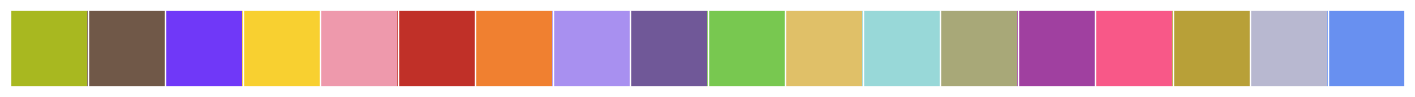

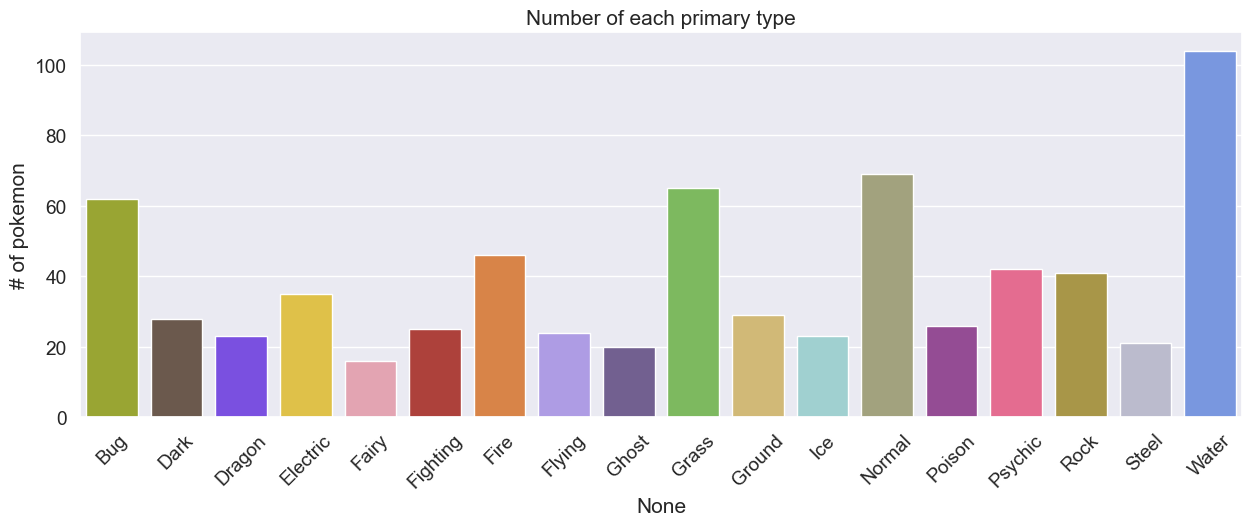

In [6]:


custom_colors = {
    'Bug': '#a8b820',
    'Dark': '#705848',
    'Dragon': '#7038f8',
    'Electric': '#f8d030',
    'Fairy': '#ee99ac',
    'Fighting': '#c03028',
    'Fire': '#f08030',
    'Flying': '#a890f0', 
    'Ghost': '#705898',
    'Grass': '#78c850',
    'Ground': '#e0c068',
    'Ice': '#98d8d8',
    'Normal': '#a8a878',
    'Poison': '#a040a0',
    'Psychic': '#f85888',
    'Rock': '#b8a038',
    'Steel': '#b8b8d0',
    'Water': '#6890f0'
}

sns.set(font_scale=1.25) 
sns.set_palette(sns.color_palette(custom_colors.values()))
sns.palplot(sns.color_palette(custom_colors.values()),size=1)
     


# find the number of each type of pokemon 
type1 = list(custom_colors.keys())
type1_nums = []
for type in type1:
  type1_nums.append(sum(df['Type1']==type))

type1_data = pd.DataFrame(data=type1_nums, index=type1, columns=['# of pokemon'])

# Créez une liste de couleurs basée sur l'ordre des types dans type1_data
bar_colors = [custom_colors[type] for type in type1_data.index]

plt.figure(figsize=(15,5))
plt.title('Number of each primary type')
ax = sns.barplot(x=type1_data.index, y='# of pokemon', data=type1_data, palette=bar_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")
plt.show()

104


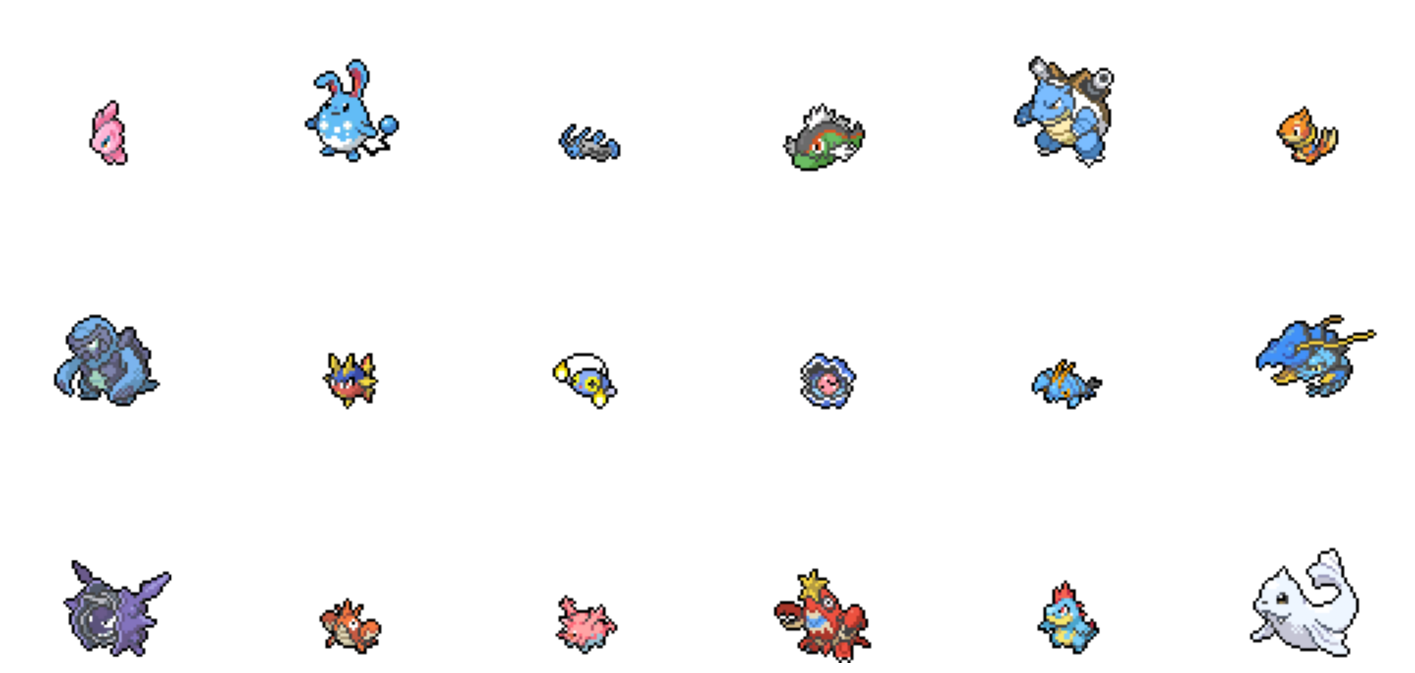

In [7]:
# determine indices
water_indices = []
water_imgs = []
for row, value in df.iterrows():
  if value['Type1'] == 'Water':
    water_indices.append(row)
    water_imgs.append(mpimg.imread(value['Filepath']))
# obtain images from the filepaths at the determined indices


# output images
f, axarr = plt.subplots(3,6, figsize=(18,9))  
count = 0
print(len(water_imgs))
for r in range(3):
  for c in range(6):
    axarr[r][c].imshow(water_imgs[count])
    axarr[r][c].set_axis_off()
    count += 1 
plt.show()

In [8]:
# limit data to Fire and Water types

df = df[(df['Type1'] == 'Water') | (df['Type1'] == 'Fire')]

print(df['Type1'].value_counts())

Type1
Water    104
Fire      46
Name: count, dtype: int64


In [9]:
# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

train_gen = keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,   # split the dataset into a training set and a validation set in an 8:2 ratio
    rescale=1./255          # rescale the rgb values to fit between 0 and 1 
)

train_data = train_gen.flow_from_dataframe(
    df,
    x_col='Filepath',
    y_col='Type1',
    target_size=(64, 64),
    color_mode='rgba',
    class_mode='sparse',
    batch_size=32,
    seed=1,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    df,
    x_col='Filepath',
    y_col='Type1',
    target_size=(64, 64),
    color_mode='rgba',
    class_mode='sparse',
    batch_size=32,
    seed=1,
    subset='validation'
)


Found 120 validated image filenames belonging to 2 classes.
Found 30 validated image filenames belonging to 2 classes.


# CNN


In [10]:

import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import F1Score

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

from tensorflow.keras.metrics import Precision, Recall, Metric

class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()


model = Sequential([
    Conv2D(62, (3, 3), activation='relu', input_shape=(64, 64, 4)),
    MaxPooling2D((2, 2)),
    Conv2D(29, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(12, (3, 3), activation='relu'),
    Flatten(),
    Dense(2048, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Classification binaire pour chaque type de Pokémon
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["recall", "precision", F1Score()])


history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=32,
    epochs=3,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau()
    ]
)
     

Epoch 1/3


C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - f1_score: 0.7925 - loss: 0.6865 - precision: 0.7000 - recall: 0.9130

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - f1_score: 0.7729 - loss: 0.7201 - precision: 0.6500 - recall: 0.9553 - val_f1_score: 0.8627 - val_loss: 0.6451 - val_precision: 0.9167 - val_recall: 0.8148 - learning_rate: 0.0010
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - f1_score: 0.8116 - loss: 0.6502 - precision: 0.6839 - recall: 1.0000 - val_f1_score: 0.9474 - val_loss: 0.4199 - val_precision: 0.9000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - f1_score: 0.7830 - loss: 0.5730 - precision: 0.6435 - recall: 1.0000 - val_f1_score: 0.9643 - val_loss: 0.2974 - val_precision: 0.9310 - val_recall: 1.0000 - learning_rate: 0.0010


# ANN

In [20]:
import numpy as np
import cv2
import pandas as pd
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from pathlib import Path

# Définition du chemin vers le répertoire contenant les images
train_dir = 'sprites/'
train_path = Path(train_dir)

# Création d'un DataFrame avec le nom et le chemin de chaque image Pokémon
files = list(train_path.glob('*.png'))
names = [os.path.split(x)[1] for x in list(train_path.glob('*.png'))]
image_df = pd.concat([pd.Series(names, name='Name'), pd.Series(files, name='Filepath').astype(str)], axis=1)
image_df['Name'] = image_df['Name'].apply(lambda x: re.sub(r'\.\w+$', '', x)).str.lower()

# Chargement du CSV contenant le nom, le type primaire et le type secondaire de chaque Pokémon
label_df = pd.read_csv('dataset.csv')
label_df['Name'] = label_df['Name'].str.lower()

# Fusion des DataFrames image_df et label_df
df = image_df.merge(label_df, on='Name')
df.loc[(df['Type 1'] == 'Normal') & (df['Type 2'] == 'Flying'), 'Type 1'] = 'Flying'

# Suppression des colonnes non nécessaires
df = df.drop(['Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'], axis=1)
df.columns = ['Name', 'Filepath', 'no', 'Type1']

# Chargement des images depuis les chemins de fichiers et conversion des étiquettes en encodage one-hot
def load_images(filepaths):
    images = []
    for filepath in filepaths:
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (100, 100))  # Redimensionner l'image à 100x100 pixels
        images.append(image)
    return np.array(images)

# Charger les images depuis les chemins de fichier
X = load_images(df['Filepath'])

# Les étiquettes de sortie (Type1)
y = df['Type1']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des valeurs des pixels des images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Mapper les étiquettes de chaînes de caractères à des entiers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convertir les étiquettes en encodage one-hot

y_train_categorical = to_categorical(y_train_encoded, 18)
y_test_categorical = to_categorical(y_test_encoded, 18)

# Création du modèle ANN
model = Sequential([
    Flatten(input_shape=(100, 100)),  # Aplatir l'image en une seule dimension
    Dense(128, activation='relu'),     # Couche dense avec 128 neurones et fonction d'activation ReLU
    Dense(18, activation='softmax')  # Couche de sortie avec une activation softmax pour la classification multiclasse
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Convertir les prédictions en étiquettes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Calcul des métriques
accuracy = accuracy_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Affichage des métriques
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)


Epoch 1/10


C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0766 - loss: 3.0648 - val_accuracy: 0.1964 - val_loss: 2.8529
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1509 - loss: 2.6552 - val_accuracy: 0.1518 - val_loss: 2.8405
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2996 - loss: 2.4073 - val_accuracy: 0.1071 - val_loss: 2.8658
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3638 - loss: 2.2205 - val_accuracy: 0.1339 - val_loss: 2.9752
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3859 - loss: 2.1121 - val_accuracy: 0.1607 - val_loss: 2.9717
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4398 - loss: 1.9039 - val_accuracy: 0.0893 - val_loss: 3.1185
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5279 - loss: 1.8406 - val_accuracy: 0.1518 - val_loss: 3.0938
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5279 - loss: 1.6993 - val_accuracy: 0.1250 - val_loss: 3.1726
Ep

# Regression Logistique 


In [3]:
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression(max_iter=1000)

print(y_train)

model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul et affichage du score F1
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

[1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1
 0 1 1 1 0 0 0 0 1]
F1 Score: 0.8095238095238095


# Regression Logistique OvR

In [116]:
from sklearn.multiclass import OneVsRestClassifier


logistic_model = LogisticRegression(max_iter=1000)

# Création du classificateur One-vs-Rest
ovr_classifier = OneVsRestClassifier(logistic_model)

# Entraînement du modèle
ovr_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = ovr_classifier.predict(X_test)

# Calcul et affichage du score F1
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'F1 Score: {f1}')

Dimensions des ensembles d'apprentissage pour Grass:
X_train shape: (52, 4096), y_train shape: (52,)
Dimensions des ensembles d'apprentissage pour Fire:
X_train shape: (36, 4096), y_train shape: (36,)
Dimensions des ensembles d'apprentissage pour Water:
X_train shape: (83, 4096), y_train shape: (83,)
Dimensions des ensembles d'apprentissage pour Bug:
X_train shape: (49, 4096), y_train shape: (49,)
Dimensions des ensembles d'apprentissage pour Normal:
X_train shape: (72, 4096), y_train shape: (72,)
Dimensions des ensembles d'apprentissage pour Poison:
X_train shape: (20, 4096), y_train shape: (20,)
Dimensions des ensembles d'apprentissage pour Electric:
X_train shape: (28, 4096), y_train shape: (28,)
Dimensions des ensembles d'apprentissage pour Ground:
X_train shape: (23, 4096), y_train shape: (23,)
Dimensions des ensembles d'apprentissage pour Fairy:
X_train shape: (12, 4096), y_train shape: (12,)
Dimensions des ensembles d'apprentissage pour Fighting:
X_train shape: (20, 4096), y_tra

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Grass'

# Decision Tree

In [51]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from pathlib import Path
import os

tree_model = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
tree_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = tree_model.predict(X_test)

# Calcul et affichage du score F1
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.7027027027027027


# SVM


In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score


# Création du modèle SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entraînement du modèle
svm_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Calcul et affichage du score F1
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# Autres métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

F1 Score: 0.8
Accuracy: 0.7333333333333333


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Calcul et affichage du score F1
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# Autres métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

F1 Score: 0.875
Accuracy: 0.8


# KNN

In [53]:


from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle
knn_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn_model.predict(X_test)

# Calcul et affichage du score F1
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# Autres métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

F1 Score: 0.7
Accuracy: 0.6


# Plot pour le CNN

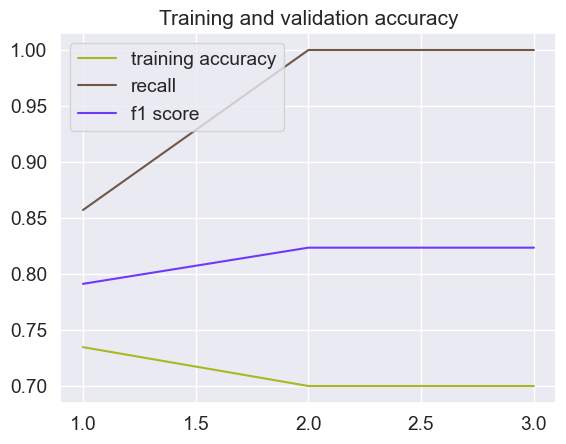

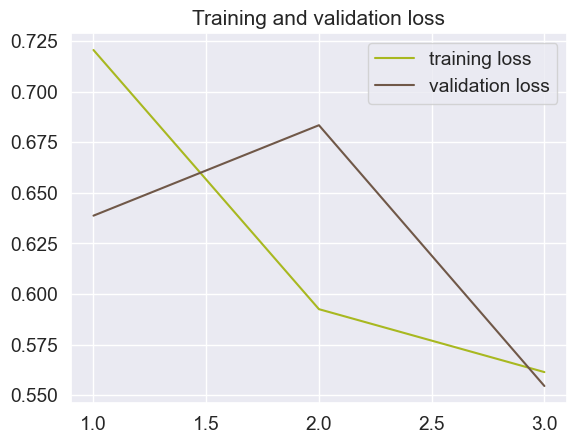

In [17]:

f1_score = history.history['f1_score']
precision = history.history['precision']
recall = history.history['recall']


# retrieve loss history on training and validation data
loss = history.history['loss']
val_loss = history.history['val_loss']

# get number of epochs
epochs = range(1, len(loss) + 1)

# plot training and validation accuracy per epoch
plt.plot(epochs, precision, label='training accuracy')
plt.plot(epochs, recall, label='recall')
plt.plot(epochs, f1_score, label='f1 score')

plt.title('Training and validation accuracy')
plt.legend()

# plot training and validation loss per epoch
plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('Training and validation loss')
plt.legend()

# Prédiction CNN


In [29]:
# get true labels
true_labels = val_data.labels

# get predictions in the form of probablities 
predictions = model.predict(val_data)

# convert probablities into binary values 
predictions = [1 if n >= 0.5 else 0 for n in predictions]
print("Model predictions: "+str(predictions))
print("Actual labels:     "+str(true_labels))

# determine filepaths of misclassified pokemon
num_misclasssified = 0
misclassified_filepaths = []
correctness = []
for pred, label, i in zip(predictions, true_labels, range(len(predictions))):
  misclassified_filepaths.append(val_data.filepaths[i])
  if pred != label:
    correctness.append('incorrect')
    num_misclasssified += 1
  else:
    correctness.append('correct')

print("# of misclassified pokemon: "+str(num_misclasssified))
     

MemoryError: Unable to allocate 1.88 MiB for an array with shape (30, 64, 64, 4) and data type float32

# Prédiction Logistique Regression


In [47]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from pathlib import Path

def prepare_image(filepath):
    # Charge l'image en niveaux de gris
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"L'image à '{filepath}' n'a pas pu être chargée. Veuillez vérifier le chemin d'accès.")
    img_resized = cv2.resize(img, (64, 64))  # Redimensionne l'image
    img_flat = img_resized.flatten()  # Aplatit l'image en un vecteur 1D
    img_normalized = img_flat / 255.0  # Normalise l'image
    return img_normalized

# Votre modèle LogisticRegression ici
# Assurez-vous que votre modèle est entraîné avant d'utiliser ce script pour faire des prédictions
# model = LogisticRegression()
# model.fit(X_train, y_train)  # Exemple d'entraînement, assurez-vous d'avoir défini X_train et y_train

# Chemin vers le répertoire contenant les images des Pokémon
sprites_dir = 'C:\\Users\\mathi\\Documents\\ProjetIA\\sprites'

# Chargement du DataFrame contenant les noms et les types des Pokémon
df = pd.read_csv('dataset.csv')

# Filtrage pour obtenir uniquement les Pokémon de type Feu et Eau
filtered_df = df[(df['Type 1'] == 'Water') | (df['Type 1'] == 'Fire')]

y_true = []  # Liste pour stocker les étiquettes réelles
y_pred = []  # Liste pour stocker les prédictions

# Itérer sur chaque Pokémon de type Feu et Eau
for _, row in filtered_df.iterrows():
    pokemon_name = row['Name'].lower()
    pokemon_type = row['Type 1']
    image_path = os.path.join(sprites_dir, f"{pokemon_name}.png")
    
    if not os.path.exists(image_path):
        print(f"Image pour {pokemon_name} introuvable à l'emplacement {image_path}.")
        continue
    
    image_prepared = prepare_image(image_path)
    image_prepared = image_prepared.reshape(1, -1)  # Ajout d'une dimension
    
    prediction = model.predict(image_prepared)
    predicted_type = "Eau" if prediction[0] == 1 else "Feu"
    
    print(f"La prédiction pour {pokemon_name} ({pokemon_type}) est : {predicted_type}")
    
    y_true.append(1 if pokemon_type == 'Water' else 0)
    y_pred.append(prediction[0])

# Calcul et affichage des métriques
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


La prédiction pour charmander (Fire) est : Feu
La prédiction pour charmeleon (Fire) est : Feu
La prédiction pour charizard (Fire) est : Eau
Image pour charizardmega charizard x introuvable à l'emplacement C:\Users\mathi\Documents\ProjetIA\sprites\charizardmega charizard x.png.
Image pour charizardmega charizard y introuvable à l'emplacement C:\Users\mathi\Documents\ProjetIA\sprites\charizardmega charizard y.png.
La prédiction pour squirtle (Water) est : Eau
La prédiction pour wartortle (Water) est : Eau
La prédiction pour blastoise (Water) est : Eau
Image pour blastoisemega blastoise introuvable à l'emplacement C:\Users\mathi\Documents\ProjetIA\sprites\blastoisemega blastoise.png.
La prédiction pour vulpix (Fire) est : Feu
La prédiction pour ninetales (Fire) est : Feu
La prédiction pour psyduck (Water) est : Eau
La prédiction pour golduck (Water) est : Eau
La prédiction pour growlithe (Fire) est : Feu
La prédiction pour arcanine (Fire) est : Feu
La prédiction pour poliwag (Water) est :

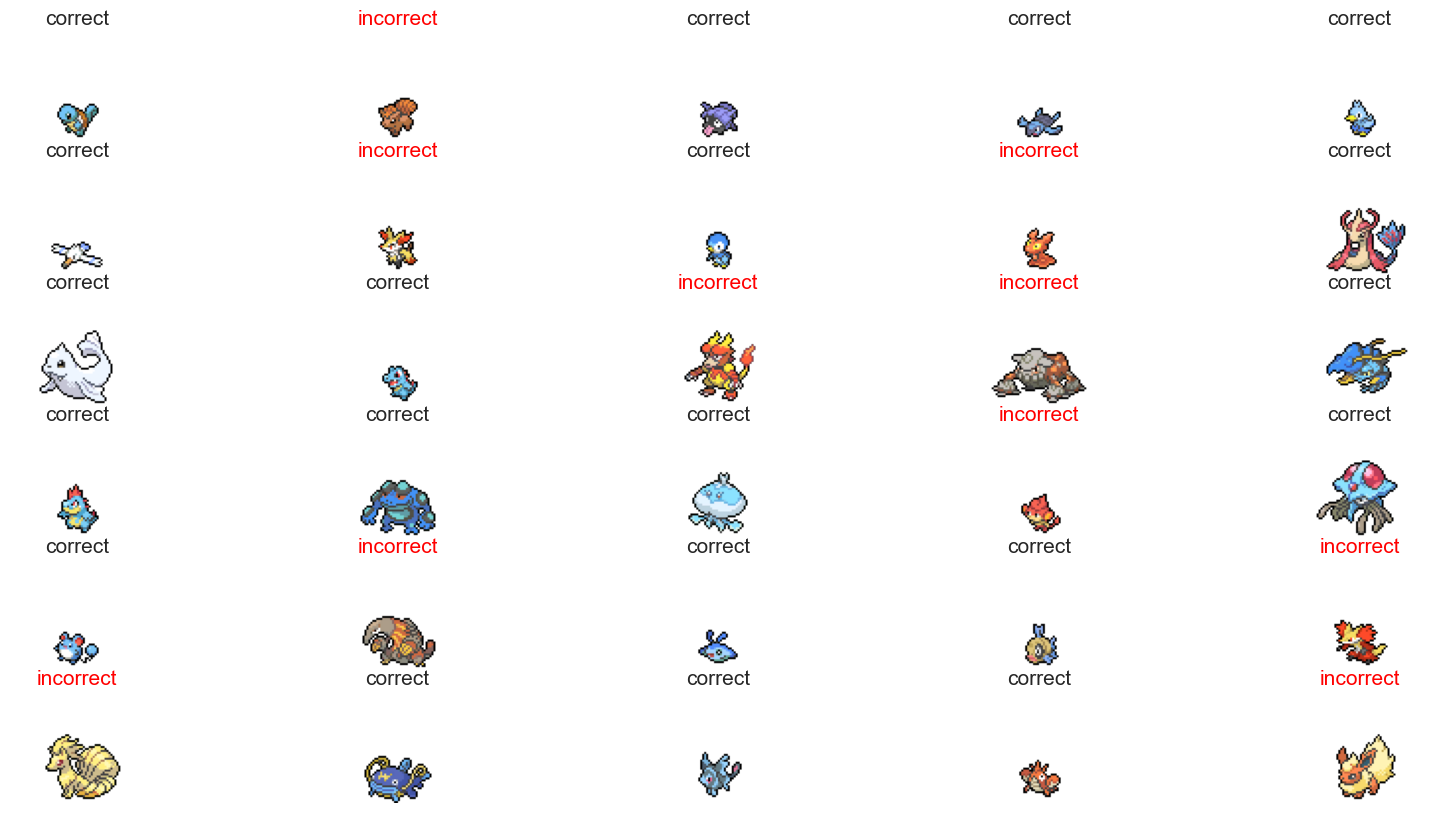

In [20]:
# obtain the images from the filepath at the determined indices
misclassified_imgs = []
for filepath in misclassified_filepaths:
  misclassified_imgs.append(mpimg.imread(filepath))

# plot results
f, axarr = plt.subplots(6,5, figsize=(20,10))  
count = 0
for r in range(6):
  for c in range(5):
    axarr[r,c].imshow(misclassified_imgs[count])
    if correctness[count] == 'correct':
      axarr[r,c].set_title(correctness[count])
    else:
      axarr[r,c].set_title(correctness[count], color='red')
    axarr[r,c].set_axis_off()
    count += 1 
plt.show()

# Début du Compte Rendu


Pour notre projet de détection de type en fonction d'une image d'un Pokémon, nous avons pensé à plusieurs approches et notre raisonnement s'est déroulé en plusieurs étapes.

Comme dans Pokémon, il y a 18 classes, notre toute première approche était de construire un réseau de neurones avec 18 neurones en sortie, donc 1 pour chaque classe.

Cependant, après avoir lancé notre code, nous avons très vite remarqué des scores très bas, tant en précision qu'en rappel. Notre premier modèle n'arrivait pas à donner correctement un type selon une image donnée. Ainsi, il n'arrivait pas à apprendre et faisait de "l'underfitting".

Nous nous sommes donc demandé pourquoi les scores étaient aussi faibles et nous avons directement pensé au fait que nos classes étaient déséquilibrées. Par exemple, les Pokémon de type "Ice" sont très peu nombreux dans notre dataset. Donc, nous avons pensé à essayer le K-stratified Cross Validation pour gérer le déséquilibre dans nos différentes classes. Les scores ont augmenté mais très peu. Alors, nous en avons conclu que soit le K-stratified Cross Validation n'arrivait pas à gérer l'important déséquilibre de certaines classes, soit, dû à notre dataset de petite taille, notre modèle ne parvenait pas à être performant.

Nous avons donc voulu essayer d'autres modèles pour comparer les performances. Nous avons d'abord voulu essayer la régression logistique et avons attaqué le problème comme un problème binaire plutôt que multiclasse. Nous avons donc essayé d'entraîner un modèle de régression logistique pour déterminer si un Pokémon est de type "Feu" ou "Eau" en fonction des images des Pokémon. Étant un problème binaire, nous savions comment entraîner notre modèle et le résultat fut concluant puisque notre F1-score s'élevait à 0.8. Ensuite, nous avons eu l'idée de tester cette classification binaire avec nos réseaux de neurones artificiels (ANNs) et nos résultats étaient bien plus concluants avec un F1-score de ....

Pour traiter ce problème multiclasse, nous avons opté pour une stratégie One vs Rest, où par exemple, nous allions entraîner notre modèle à savoir si un Pokémon est de type "Feu" ou "Non Feu", puis faire de même pour les 17 types restants. Cependant, les résultats furent mauvais une fois de plus. En effet, nos modèles obtenaient à chaque fois une précision élevée (environ 0.95), mais un F1-score proche de 0. La raison de cette grande précision était que notre modèle classait tous les Pokémon comme "Non Feu", et comme nos 2 classes étaient extrêmement déséquilibrées (40 Pokémon Feu pour 700 Non Feu), nous avions une précision élevée mais un rappel proche de 0. Ainsi, en raison des déséquilibres trop importants entre une classe et le reste, nous avons tenté une approche de type One vs One. En effet, comme observé précédemment entre Feu vs Eau, nous avons remarqué que notre modèle obtenait un F1-score correct, et alors nous nous sommes dit que pour toutes les classes, cela pourrait être la même chose. Ainsi, après avoir entraîné tous nos modèles puis fait la moyenne de leurs performances par classe, nous avons obtenu un Mean F1-score pour chaque type au-dessus de 0.6.